# Data for glass  ( Normalization & prediction )

In [15]:
    # Class of k-Nearest Neigbor Classifier


    class kNN():
        maxTrain = []

        def __init__(self, k = 3, exp = 2):
        # constructor for kNN classifier 
        # k is the number of neighbor for local class estimation
        # exp is the exponent for the Minkowski distance
            self.k = k
            self.exp = exp

        def fit(self, X_train, Y_train):
        # training k-NN method
        # X_train is the training data given with input attributes. n-th row correponds to n-th instance.
        # Y_train is the output data (output vector): n-th element of Y_train is the output value for n-th instance in X_train.
            self.X_train = X_train
            self.Y_train = Y_train   

        def getDiscreteClassification(self, X_test):
        # predict-class k-NN method
        # X_test is the test data given with input attributes. Rows correpond to instances
        # Method outputs prediction vector Y_pred_test:  n-th element of Y_pred_test is the prediction for n-th instance in X_test

            Y_pred_test = [] #prediction vector Y_pred_test for all the test instances in X_test is initialized to empty list []



            for i in range(len(X_test)):   #iterate over all instances in X_test
                test_instance = X_test.iloc[i] #i-th test instance 

                distances = []  #list of distances of the i-th test_instance for all the train_instance s in X_train, initially empty.

                for j in range(len(self.X_train)):  #iterate over all instances in X_train
                    train_instance = self.X_train.iloc[j] #j-th training instance 
                    distance = self.Minkowski_distance(test_instance, train_instance) #distance between i-th test instance and j-th training instance  
                    distances.append(distance) #add the distance to the list of distances of the i-th test_instance

                # Store distances in a dataframe. The dataframe has the index of Y_train in order to keep the correspondence with the classes of the training instances 
                df_dists = pd.DataFrame(data=distances, columns=['dist'], index = self.Y_train.index)

                # Sort distances, and only consider the k closest points in the new dataframe df_knn
                df_nn = df_dists.sort_values(by=['dist'], axis=0)
                df_knn =  df_nn[:self.k]

                # Note that the index df_knn.index of df_knn contains indices in Y_train of the k-closed training instances to 
                # the i-th test instance. Thus, the dataframe self.Y_train[df_knn.index] contains the classes of those k-closed 
                # training instances. Method value_counts() computes the counts (number of occurencies) for each class in 
                # self.Y_train[df_knn.index] in dataframe predictions. 
                predictions = self.Y_train[df_knn.index].value_counts()

                # the first element of the index predictions.index contains the class with the highest count; i.e. the prediction y_pred_test.
                y_pred_test = predictions.index[0]

                # add the prediction y_pred_test to the prediction vector Y_pred_test for all the test instances in X_test
                Y_pred_test.append(y_pred_test)

            return Y_pred_test


        def Minkowski_distance(self, x1, x2):
        # computes the Minkowski distance of x1 and x2 for two labeled instances (x1,y1) and (x2,y2)

            # Set initial distance to 0
            distance = 0

            # Calculate Minkowski distance using the exponent exp
            for i in range(len(x1)):
                distance = distance + abs(x1[i] - x2[i])**self.exp

            distance = distance**(1/self.exp)

            return distance


        def normilize_maximum_absolute_scaling(self,df):   
            # copy the dataframe
            df_scaled = df.copy()
            # apply maximum absolute scaling 
            for column in df_scaled.columns:  
                  df_scaled[column] = df_scaled[column]  / df_scaled[column].abs().max()

            return df_scaled

        def getClassProbs (self, X_test):

                # getting value type for Y
            Y_type_list =  Y_train.tolist()
            Y_type_no_dublicate = list(dict.fromkeys(Y_type_list))

            #creating new datafaram for prob
            df_probs = pd.DataFrame(index=Y_type_no_dublicate)

            Y_pred_test = [] #prediction vector Y_pred_test for all the test instances in X_test is initialized to empty list []
            for i in range(len(X_test)):   #iterate over all instances in X_test
                test_instance = X_test.iloc[i] #i-th test instance 

                distances = []  #list of distances of the i-th test_instance for all the train_instance s in X_train, initially empty.

                for j in range(len(self.X_train)):  #iterate over all instances in X_train
                    train_instance = self.X_train.iloc[j] #j-th training instance 
                    distance = self.Minkowski_distance(test_instance, train_instance) #distance between i-th test instance and j-th training instance  
                    distances.append(distance) #add the distance to the list of distances of the i-th test_instance

                df_dists = pd.DataFrame(data=distances, columns=['dist'], index = self.Y_train.index)
    #             print(df_dists)
                df_nn = df_dists.sort_values(by=['dist'], axis=0)
                df_knn =  df_nn[:self.k]
                # calculating probability of having sam one Y_train type 
                predictions = self.Y_train[df_knn.index].value_counts() 


                df_probs['test'+str(i)] = predictions/self.k


            print(df_probs)
 
            
        # Class of k-Nearest Neigbor Classifier



Orgiginal Data

          RI     Na    Mg    Al     Si     K     Ca    Ba    Fe
166  1.51747  12.84  3.50  1.14  73.27  0.56   8.55  0.00  0.00
21   1.52475  11.45  0.00  1.88  72.19  0.81  13.24  0.00  0.34
136  1.51754  13.48  3.74  1.17  72.99  0.59   8.03  0.00  0.00
206  1.51623  14.20  0.00  2.79  73.46  0.04   9.04  0.40  0.09
75   1.51652  13.56  3.57  1.47  72.45  0.64   7.96  0.00  0.00
..       ...    ...   ...   ...    ...   ...    ...   ...   ...
113  1.51651  14.38  0.00  1.94  73.61  0.00   8.48  1.57  0.00
64   1.52320  13.72  3.72  0.51  71.75  0.09  10.06  0.00  0.16
15   1.51707  13.48  3.48  1.71  72.52  0.62   7.99  0.00  0.00
125  1.51748  12.86  3.56  1.27  73.21  0.54   8.38  0.00  0.17
9    1.51789  13.19  3.90  1.30  72.33  0.55   8.44  0.00  0.28

[141 rows x 9 columns]
          RI     Na    Mg    Al     Si     K    Ca   Ba    Fe
161  1.52172  13.51  3.86  0.88  71.79  0.23  9.54  0.0  0.11
120  1.51660  12.99  3.18  1.23  72.97  0.58  8.81  0.0  0.24
105  1.51316  13.02  0

Text(0, 0.5, 'Accuracy')

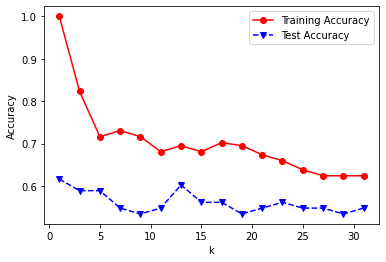

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 

from numpy.random import random
from sklearn.metrics import accuracy_score

##################################################
# Hold-out testing: Training and Test set creation
##################################################

data = pd.read_csv('glass.csv')
data.head()
Y = data['class']
X = data.drop(['class'],axis=1)



X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.34, random_state=10)

# range for the values of parameter k for kNN

k_range = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31]


trainAcc = np.zeros(len(k_range))
testAcc = np.zeros(len(k_range))


index = 0 
for k  in  k_range:
    clf = kNN(k)
    clf.fit(X_train, Y_train)
    Y_predTrain = clf.getDiscreteClassification(X_train)
    Y_predTest = clf.getDiscreteClassification(X_test)
    trainAcc[index] = accuracy_score(Y_train, Y_predTrain)
    testAcc[index] = accuracy_score(Y_test, Y_predTest)
    
    index += 1
   
    
#########################################
# Plot of training and test accuracies
#########################################
print(X_train)
print(X_test)

plt.plot(k_range,trainAcc,'ro-',k_range,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('k')
plt.ylabel('Accuracy')

in here as you can see all of the values of each culumn ahave very vary rang.

Normalize data:

           RI        Na        Mg        Al        Si         K        Ca  \
166  0.989269  0.738780  0.881612  0.377483  0.971622  0.090177  0.528104   
21   0.994015  0.658803  0.000000  0.622517  0.957300  0.130435  0.817789   
136  0.989315  0.775604  0.942065  0.387417  0.967909  0.095008  0.495985   
206  0.988461  0.817031  0.000000  0.923841  0.974141  0.006441  0.558369   
75   0.988650  0.780207  0.899244  0.486755  0.960748  0.103060  0.491662   
..        ...       ...       ...       ...       ...       ...       ...   
113  0.988644  0.827388  0.000000  0.642384  0.976130  0.000000  0.523780   
64   0.993005  0.789413  0.937028  0.168874  0.951465  0.014493  0.621371   
15   0.989009  0.775604  0.876574  0.566225  0.961676  0.099839  0.493515   
125  0.989276  0.739931  0.896725  0.420530  0.970826  0.086957  0.517603   
9    0.989543  0.758918  0.982368  0.430464  0.959157  0.088567  0.521309   

           Ba        Fe  
166  0.000000  0.000000  
21   0.000000  0.918919

Text(0, 0.5, 'Accuracy')

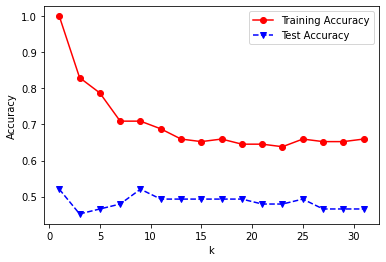

In [113]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 

from numpy.random import random
from sklearn.metrics import accuracy_score

##################################################
# Hold-out testing: Training and Test set creation
##################################################

data = pd.read_csv('glass.csv')
data.head()
Y = data['class']
X = data.drop(['class'],axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.34, random_state=10)


# range for the values of parameter k for kNN

k_range = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31]

trainAcc = np.zeros(len(k_range))
testAcc = np.zeros(len(k_range))

index = 0 
for k  in  k_range:
    clf = kNN(k)
    
    X_train = clf.normilize_maximum_absolute_scaling(X_train)
    X_test = clf.normilize_maximum_absolute_scaling(X_test)
    clf.fit(X_train, Y_train)
    Y_predTrain = clf.getDiscreteClassification(X_train)
    Y_predTest = clf.getDiscreteClassification(X_test)
    trainAcc[index] = accuracy_score(Y_train, Y_predTrain)
    testAcc[index] = accuracy_score(Y_test, Y_predTest)
    index += 1

   
    
# #########################################
# # Plot of training and test accuracies
# #########################################
# # trainAcc
print(X_train)
print(X_test)

plt.plot(k_range,trainAcc,'ro-',k_range,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('k')
plt.ylabel('Accuracy')


in here you can see after Normalization all of the numbers are between 0 and 1.
I useed absolute mean value to calculate the rate for normalization data 
and as you can see in the graph the accuracy for both test and train data have been improved  in compare to 
not normalize data. 

# changing exp for glass data


not normalize


<ipython-input-112-c08c10cd0486>:69: RuntimeWarning: overflow encountered in double_scalars
  distance = distance + abs(x1[i] - x2[i])**self.exp


Text(0, 0.5, 'Accuracy')

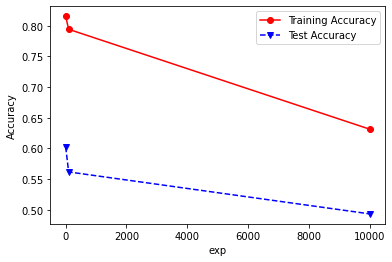

In [118]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from numpy.random import random

##################################################
# Hold-out testing: Training and Test set creation
##################################################

data = pd.read_csv('glass.csv')
data.head()
Y = data['class']
X = data.drop(['class'],axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.34, random_state=10)


# range for the values of parameter exp for kNN

exp_range = [2,  100, 10000]

trainAcc = np.zeros(len(exp_range))
testAcc = np.zeros(len(exp_range))


index = 0 
for exp  in  exp_range:
    clf = kNN(k = 3, exp = exp)
    clf.fit(X_train, Y_train)
    Y_predTrain = clf.getDiscreteClassification(X_train)
    Y_predTest = clf.getDiscreteClassification(X_test)
    trainAcc[index] = accuracy_score(Y_train, Y_predTrain)
    testAcc[index] = accuracy_score(Y_test, Y_predTest)
    index += 1
   
    
#########################################
# Plot of training and test accuracies
#########################################


plt.plot(exp_range,trainAcc,'ro-',exp_range,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('exp')
plt.ylabel('Accuracy')


in here as you can see all of the values of each culumn ahave very vary rang.

after normalization

           RI        Na        Mg        Al        Si         K        Ca  \
166  0.989269  0.738780  0.881612  0.377483  0.971622  0.090177  0.528104   
21   0.994015  0.658803  0.000000  0.622517  0.957300  0.130435  0.817789   
136  0.989315  0.775604  0.942065  0.387417  0.967909  0.095008  0.495985   
206  0.988461  0.817031  0.000000  0.923841  0.974141  0.006441  0.558369   
75   0.988650  0.780207  0.899244  0.486755  0.960748  0.103060  0.491662   
..        ...       ...       ...       ...       ...       ...       ...   
113  0.988644  0.827388  0.000000  0.642384  0.976130  0.000000  0.523780   
64   0.993005  0.789413  0.937028  0.168874  0.951465  0.014493  0.621371   
15   0.989009  0.775604  0.876574  0.566225  0.961676  0.099839  0.493515   
125  0.989276  0.739931  0.896725  0.420530  0.970826  0.086957  0.517603   
9    0.989543  0.758918  0.982368  0.430464  0.959157  0.088567  0.521309   

           Ba        Fe  
166  0.000000  0.000000  
21   0.000000  0.918919

Text(0, 0.5, 'Accuracy')

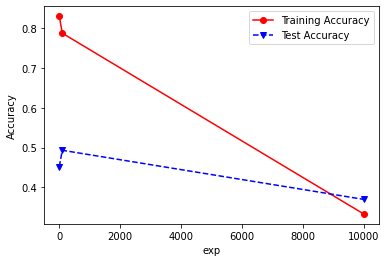

In [123]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 

from numpy.random import random
from sklearn.metrics import accuracy_score

##################################################
# Normalize testing: Training and Test set creation
##################################################

data = pd.read_csv('glass.csv')
data.head()
Y = data['class']
X = data.drop(['class'],axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.34, random_state=10)


# range for the values of parameter exp for kNN

exp_range = [2,  100, 10000]

trainAcc = np.zeros(len(exp_range))
testAcc = np.zeros(len(exp_range))


index = 0 
for exp  in  exp_range:
    
    clf = kNN(k = 3, exp = exp)
    X_train = clf.normilize_maximum_absolute_scaling(X_train)
    X_test = clf.normilize_maximum_absolute_scaling(X_test)
    clf.fit(X_train, Y_train)
    Y_predTrain = clf.getDiscreteClassification(X_train)
    Y_predTest = clf.getDiscreteClassification(X_test)
    trainAcc[index] = accuracy_score(Y_train, Y_predTrain)
    testAcc[index] = accuracy_score(Y_test, Y_predTest)
    index += 1

    
# #########################################
# # Plot of training and test accuracies
# #########################################
# # trainAcc
print(X_train)
print(X_test)

plt.plot(exp_range,trainAcc,'ro-',exp_range,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('exp')
plt.ylabel('Accuracy')

in here you can see after Normalization all of the numbers are between 0 and 1.
I useed absolute mean value to calculate the rate for normalization data 
and as you can see in the graph the accuracy for both test and train data have been improved  in compare to 
not normalize data. 

# Prediction

                        test0  test1  test2  test3  test4  test5  test6  \
'build wind float'        1.0    1.0    NaN    1.0    1.0    NaN    1.0   
'build wind non-float'    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
headlamps                 NaN    NaN    NaN    NaN    NaN    1.0    NaN   
'vehic wind float'        NaN    NaN    NaN    NaN    NaN    NaN    NaN   
containers                NaN    NaN    1.0    NaN    NaN    NaN    NaN   
tableware                 NaN    NaN    NaN    NaN    NaN    NaN    NaN   

                        test7  test8  test9  ...  test63  test64  test65  \
'build wind float'        NaN    NaN    NaN  ...     NaN     1.0     1.0   
'build wind non-float'    NaN    NaN    1.0  ...     NaN     NaN     NaN   
headlamps                 NaN    NaN    NaN  ...     NaN     NaN     NaN   
'vehic wind float'        NaN    1.0    NaN  ...     NaN     NaN     NaN   
containers                NaN    NaN    NaN  ...     1.0     NaN     NaN   
tableware         

                        test0  test1  test2  test3  test4  test5  test6  \
'build wind float'        9.0   11.0    NaN    4.0    7.0    NaN   11.0   
'build wind non-float'    NaN    NaN    4.0    7.0    2.0    NaN    NaN   
headlamps                 NaN    NaN    4.0    NaN    NaN   11.0    NaN   
'vehic wind float'        2.0    NaN    NaN    NaN    2.0    NaN    NaN   
containers                NaN    NaN    3.0    NaN    NaN    NaN    NaN   
tableware                 NaN    NaN    NaN    NaN    NaN    NaN    NaN   

                        test7  test8  test9  ...  test63  test64  test65  \
'build wind float'        1.0    1.0    2.0  ...     NaN    10.0     7.0   
'build wind non-float'    1.0    7.0    8.0  ...     3.0     1.0     4.0   
headlamps                 6.0    NaN    NaN  ...     NaN     NaN     NaN   
'vehic wind float'        1.0    3.0    1.0  ...     NaN     NaN     NaN   
containers                NaN    NaN    NaN  ...     6.0     NaN     NaN   
tableware         

                        test0  test1  test2  test3  test4  test5  test6  \
'build wind float'       13.0   19.0    NaN    7.0   12.0    NaN   18.0   
'build wind non-float'    2.0    2.0   10.0   11.0    4.0    1.0    2.0   
headlamps                 NaN    NaN    6.0    NaN    1.0   18.0    NaN   
'vehic wind float'        6.0    NaN    2.0    3.0    4.0    NaN    1.0   
containers                NaN    NaN    3.0    NaN    NaN    1.0    NaN   
tableware                 NaN    NaN    NaN    NaN    NaN    1.0    NaN   

                        test7  test8  test9  ...  test63  test64  test65  \
'build wind float'          4    4.0    5.0  ...     NaN    17.0    12.0   
'build wind non-float'      3   14.0   13.0  ...     5.0     4.0     9.0   
headlamps                  10    NaN    NaN  ...     6.0     NaN     NaN   
'vehic wind float'          1    3.0    3.0  ...     NaN     NaN     NaN   
containers                  1    NaN    NaN  ...     7.0     NaN     NaN   
tableware         

                        test0  test1  test2  test3  test4  test5  test6  \
'build wind float'       17.0   22.0    1.0   10.0   18.0    1.0   22.0   
'build wind non-float'    7.0    5.0   13.0   15.0    7.0    3.0    5.0   
headlamps                 1.0    1.0   11.0    NaN    1.0   18.0    1.0   
'vehic wind float'        6.0    3.0    3.0    6.0    4.0    NaN    3.0   
containers                NaN    NaN    3.0    NaN    NaN    5.0    NaN   
tableware                 NaN    NaN    NaN    NaN    1.0    4.0    NaN   

                        test7  test8  test9  ...  test63  test64  test65  \
'build wind float'          5    8.0    7.0  ...     2.0    22.0    17.0   
'build wind non-float'      6   19.0   21.0  ...     9.0     8.0    14.0   
headlamps                  13    NaN    NaN  ...    10.0     NaN     NaN   
'vehic wind float'          4    4.0    3.0  ...     NaN     1.0     NaN   
containers                  1    NaN    NaN  ...     7.0     NaN     NaN   
tableware         

Text(0, 0.5, 'Accuracy')

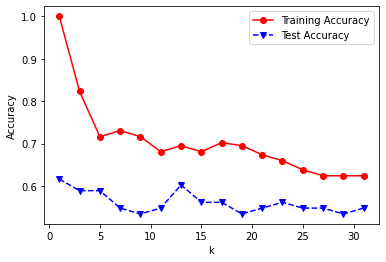

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 

from numpy.random import random
from sklearn.metrics import accuracy_score

##################################################
# Hold-out testing: Training and Test set creation
##################################################

data = pd.read_csv('glass.csv')
data.head()
Y = data['class']
X = data.drop(['class'],axis=1)



X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.34, random_state=10)

# range for the values of parameter k for kNN

k_range = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31]


trainAcc = np.zeros(len(k_range))
testAcc = np.zeros(len(k_range))


index = 0 
for k  in  k_range:
    clf = kNN(k)
#     X_train = clf.normilize_maximum_absolute_scaling(X_train)
#     X_test = clf.normilize_maximum_absolute_scaling(X_test)
    clf.fit(X_train, Y_train)
    Y_predTrain = clf.getDiscreteClassification(X_train)
    Y_predTest = clf.getDiscreteClassification(X_test)
    trainAcc[index] = accuracy_score(Y_train, Y_predTrain)
    testAcc[index] = accuracy_score(Y_test, Y_predTest)
    clf.getClassProbs(X_test)
    
    index += 1
   
    
#########################################
# Plot of training and test accuracies
#########################################
print(X_train)
print(X_test)

plt.plot(k_range,trainAcc,'ro-',k_range,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('k')
plt.ylabel('Accuracy')

in here I caclute the probablity of happening of each Y for each test cases . which are showned in the above table.
the data that has been used are normalized